# Лабораторна робота №2
### Студента групи МІТ-31
### Квартюка Олексія
#### Завдання
##### Частина 1: Регресія на згенерованому наборі даних

Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.

Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.

Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

##### Частина 2: Аналіз часових даних

Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

Завантажте та візуалізуйте ці дані. Переконайтеся, що ви розумієте основні характеристики часового ряду, такі як тренд, сезонність, аномалії тощо.

Використовуйте методи аналізу часових рядів, такі як розкладання на компоненти, автокореляція тощо, для отримання інсайтів і підготовки даних для моделювання.

##### Частина 3: Підготовка та аналіз даних на основі файлу AmesHousing.csv (виконується тільки для отримання високої оцінки).

Завантажте файл даних "AmesHousing.csv", який містить інформацію про нерухомість в місті Еймс, штат Айова, США.

Вивчіть структуру даних та характеристики ознак. Визначте цільову змінну для регресії (наприклад, ціну житла).

Виконайте підготовку даних, таку як обробка відсутніх значень, перетворення категоріальних ознак у числові, масштабування тощо.

Побудуйте модель регресії на підготовлених даних і оцініть її точність.

##### Загальні вимоги:

Для кожної частини лабораторної роботи, зробіть відповідний аналіз та виведіть результати у вигляді коду та текстового опису.

Включіть візуалізації, які допоможуть вам легше розуміти дані та результати моделювання.

Зробіть висновки для кожної частини лабораторної роботи та підсумовуйте результати.

Надайте відповіді на запитання та обговорення у текстовому вигляді.

Забезпечте чітку організацію вашого коду та коментарі до нього.


In [69]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Середньоабсолютна помилка(MAE): 0.08535103887972209
Середньоквадратична помилка(MSE): 0.011090609683465025


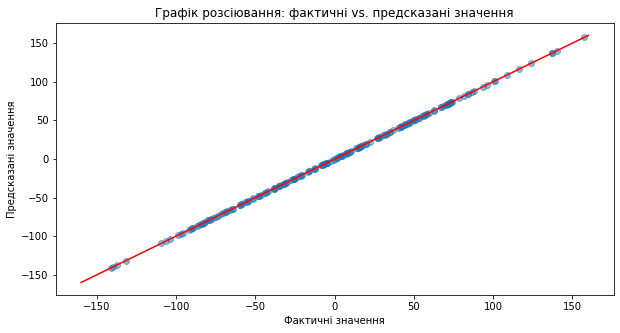

In [80]:
# Частина 1
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Середньоабсолютна помилка(MAE):", mae)
print("Середньоквадратична помилка(MSE):", mse)

# Візуалізація предсказаних та тестових даних
plt.figure(figsize=(10,5))
x = np.linspace(-160, 160)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Фактичні значення')
plt.ylabel('Предсказані значення')
plt.title('Графік розсіювання: фактичні vs. предсказані значення')
plt.show()

               yen
data              
2022-08-16  136.11
2022-08-17  137.36
2022-08-18  137.17
2022-08-19  137.67
2022-08-22  137.08
...            ...
2023-05-22  149.64
2023-05-23  149.20
2023-05-24  149.30
2023-05-25  149.63
2023-05-26  150.24

[200 rows x 1 columns]
200    150.924766
201    151.091926
202    151.143618
203    151.394262
204    151.708881
205    151.607757
206    151.193428
207    150.916201
208    151.235459
209    151.521214
210    150.905925
211    150.961666
212    151.384603
213    151.578906
214    151.768188
215    151.953614
216    152.282425
217    152.287449
218    151.981806
219    151.749442
220    151.975714
221    152.238668
222    151.739253
223    151.862917
224    152.317949
225    152.508924
226    152.681343
227    152.874762
228    153.201833
229    153.193848
230    152.874884
231    152.637021
Name: predicted_mean, dtype: float64
      lower yen   upper yen
200  148.810342  153.039190
201  148.234140  153.949713
202  147.646557  154.640679
203 

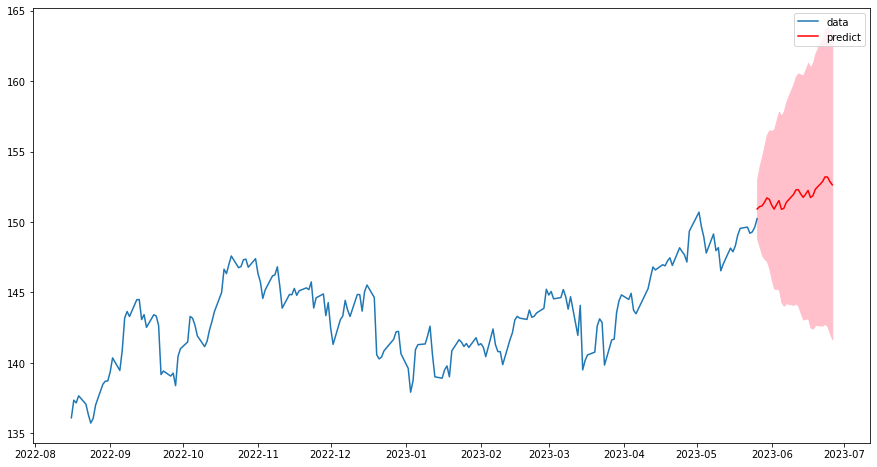

In [109]:
# Частина 2
data = pd.read_csv('euro-daily-hist_1999_2022.csv')
data_series = pd.concat([data['Period\\Unit:'], data['[Japanese yen ]']], axis=1)
data_series = data_series.head(200)
data_series.columns = ["data", "yen"]

data_series['data'] = pd.to_datetime(data_series['data'])
data_series.set_index('data', inplace=True)
data_series = data_series.iloc[::-1]
data_series['yen'] = pd.to_numeric(data_series['yen'], errors='coerce')

print(data_series)

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(data_series['yen'], order=order, seasonal_order=seasonal_order)
results = model.fit()


# Передбачення
forecast_dates = pd.date_range(start='2023-05-26', end='2023-06-26', freq='D')
forecast = results.get_forecast(steps=len(forecast_dates))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# вивід довірчих інтервалів + передбачення
print(forecast_values)
print(conf_int)

# Візуалізація
plt.figure(figsize=(15,8))
plt.plot(data_series.index, data_series['yen'], label='data')
plt.plot(forecast_dates, forecast_values, color='red', label='predict')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.legend()
plt.show()

кількість рядків до видалення рядків з nan 2930
кількість рядків після видалення рядків з nan 2930 

Середньоквадратична помилка (MSE): 1361538483.5638754
Середня абсолютна помилка (MAE): 22633.152869028785
R2: 0.8301801878458218


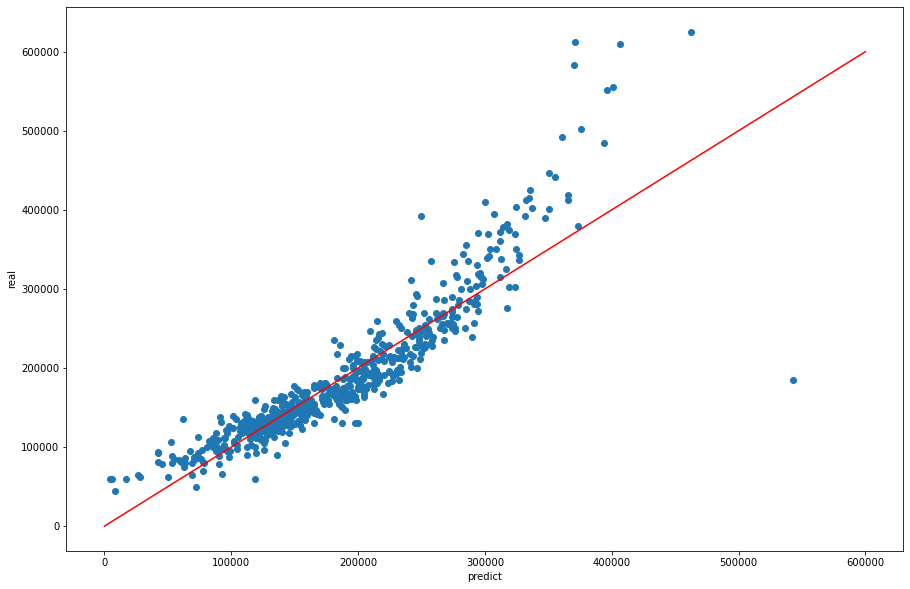

In [74]:
# Частина 3
data = pd.read_csv('AmesHousing.csv')

# Визначимо змінні для нашої моделі
data_cut = [
    'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
    'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
    'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
    'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
    'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'
]

new_data = data[data_cut]

#в цьому випадку ми просто заміняємо певну кількість рідків з nan на середнє значення(Можна було і видалити, але тоді зросте похибка вдвічі)
print("кількість рядків до видалення рядків з nan", len(new_data))
# new_data.dropna(inplace=True)
new_data.fillna(df.mean(), inplace=True)
print("кількість рядків після видалення рядків з nan",len(new_data), "\n")

new_data["MS Zoning"] = new_data["MS Zoning"].replace({'RL': 0, 'RH': 1, 'RM': 2, 'FV' : 3, 'C (all)' : 4, 'I (all)' : 5, 'A (agr)' : 6})

y = new_data['SalePrice']
X = new_data.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Середньоквадратична помилка (MSE): {mse}")
print(f"Середня абсолютна помилка (MAE): {mae}")
print(f"R2: {r2}")

#побудова графіку
plt.figure(figsize=(15,10))
x = np.linspace(0, 600000)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_pred, y_test, label='Дані')
plt.xlabel("predict")
plt.ylabel("real")
plt.show()

### Висковок по третій частині:
Як ми бачимо, наша модель, яка була створена с 27 признаків, гарно справляется з передбачуванням цін та має оптимальну похибку. Якщо ж пропущені дані не заповнювати середнім арифметичним, а тупо видаляти(це приблизно -20%), то похибка зросте вдвічі.